# Rock Type Predictions using ML

Lithology is an important factor in the exploration, drilling and production of oil and gas resources. Understanding the type and properties of the rocks and minerals in a specific area can provide valuable information about the location and size of oil and gas reservoirs, as well as the potential for recovery of these resources. This information is critical in determining the feasibility and potential success of oil and gas projects.


In this project, we are going to train a Machine learning algorithm model with features of a Well to predict the type of rock (lithology) in the Reservoir.

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Get the data

data = pd.read_csv('xeek_subset.csv')

In [3]:
data.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE,LITH
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0,Shale
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0,Shale
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0,Shale
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0,Shale
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0,Shale


In [4]:
data.shape

(133198, 30)

In [5]:
data.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE', 'LITH'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133198 entries, 0 to 133197
Data columns (total 30 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   WELL                               133198 non-null  object 
 1   DEPTH_MD                           133198 non-null  float64
 2   X_LOC                              125805 non-null  float64
 3   Y_LOC                              125805 non-null  float64
 4   Z_LOC                              125805 non-null  float64
 5   GROUP                              133198 non-null  object 
 6   FORMATION                          111632 non-null  object 
 7   CALI                               133006 non-null  float64
 8   RSHA                               62039 non-null   float64
 9   RMED                               125556 non-null  float64
 10  RDEP                               125805 non-null  float64
 11  RHOB                               1080

### Check NaN 

In [7]:
data.isna().sum()

WELL                                      0
DEPTH_MD                                  0
X_LOC                                  7393
Y_LOC                                  7393
Z_LOC                                  7393
GROUP                                     0
FORMATION                             21566
CALI                                    192
RSHA                                  71159
RMED                                   7642
RDEP                                   7393
RHOB                                  25145
GR                                        0
SGR                                  115848
NPHI                                  41473
PEF                                   32358
DTC                                     563
SP                                    39518
BS                                    35669
ROP                                    2744
DTS                                  121014
DCAL                                  76998
DRHO                            

There a lots missing values in the dataset, therefore we can not drop nan.

But we are going to replace nan with the mean of the values.

### Lets write a function to replace the missing values

In [8]:
def fill_missing_with_mean(df):
    for col in df.columns:
        if df[col].dtype in ['float64','int64']:
            mean = df[col].mean()
            df[col].fillna(mean, inplace=True)
            
    return df
            


In [9]:
data = fill_missing_with_mean(data)

In [10]:
data.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE,LITH
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,10.561825,1.611410,...,176.583712,0.972165,-0.574928,2.291368,2.568148,25.253839,-112.944168,65000,1.0,Shale
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,10.561825,1.618070,...,176.583712,0.972165,-0.570188,2.291368,2.568148,25.253839,-112.944168,65000,1.0,Shale
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,10.561825,1.626459,...,176.583712,0.972165,-0.574245,2.291368,2.568148,25.253839,-112.944168,65000,1.0,Shale
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,10.561825,1.621594,...,176.583712,0.972165,-0.586315,2.291368,2.568148,25.253839,-112.944168,65000,1.0,Shale
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,10.561825,1.602679,...,176.583712,0.972165,-0.597914,2.291368,2.568148,25.253839,-112.944168,65000,1.0,Shale


In [11]:
# Checking missing values

data.isna().sum()

WELL                                     0
DEPTH_MD                                 0
X_LOC                                    0
Y_LOC                                    0
Z_LOC                                    0
GROUP                                    0
FORMATION                            21566
CALI                                     0
RSHA                                     0
RMED                                     0
RDEP                                     0
RHOB                                     0
GR                                       0
SGR                                      0
NPHI                                     0
PEF                                      0
DTC                                      0
SP                                       0
BS                                       0
ROP                                      0
DTS                                      0
DCAL                                     0
DRHO                                     0
MUDWEIGHT  

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133198 entries, 0 to 133197
Data columns (total 30 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   WELL                               133198 non-null  object 
 1   DEPTH_MD                           133198 non-null  float64
 2   X_LOC                              133198 non-null  float64
 3   Y_LOC                              133198 non-null  float64
 4   Z_LOC                              133198 non-null  float64
 5   GROUP                              133198 non-null  object 
 6   FORMATION                          111632 non-null  object 
 7   CALI                               133198 non-null  float64
 8   RSHA                               133198 non-null  float64
 9   RMED                               133198 non-null  float64
 10  RDEP                               133198 non-null  float64
 11  RHOB                               1331

### Let's drop the unnecessary columns

In [13]:
data.drop(['GROUP','FORMATION','FORCE_2020_LITHOFACIES_LITHOLOGY','FORCE_2020_LITHOFACIES_CONFIDENCE'],axis=1,inplace=True)

In [14]:
data.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,...,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,LITH
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,19.480835,10.561825,1.611410,1.798681,1.884186,...,12.194539,34.636410,176.583712,0.972165,-0.574928,2.291368,2.568148,25.253839,-112.944168,Shale
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,19.468800,10.561825,1.618070,1.795641,1.889794,...,12.194539,34.636410,176.583712,0.972165,-0.570188,2.291368,2.568148,25.253839,-112.944168,Shale
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,19.468800,10.561825,1.626459,1.800733,1.896523,...,12.194539,34.779556,176.583712,0.972165,-0.574245,2.291368,2.568148,25.253839,-112.944168,Shale
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,19.459282,10.561825,1.621594,1.801517,1.891913,...,12.194539,39.965164,176.583712,0.972165,-0.586315,2.291368,2.568148,25.253839,-112.944168,Shale
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,19.453100,10.561825,1.602679,1.795299,1.880034,...,12.194539,57.483765,176.583712,0.972165,-0.597914,2.291368,2.568148,25.253839,-112.944168,Shale


In [15]:
data.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO
count,133198.000000,133198.000000,1.331980e+05,133198.000000,133198.000000,133198.000000,133198.000000,133198.000000,133198.000000,133198.000000,...,133198.000000,133198.000000,133198.000000,133198.000000,133198.000000,133198.000000,133198.000000,133198.000000,133198.000000,133198.000000
mean,1792.944663,451235.640835,6.471392e+06,-1719.214522,13.199399,10.561825,1.708851,1.743774,2.199556,69.553872,...,91.608922,12.194539,28.163816,176.583712,0.972165,0.009307,2.291368,2.568148,25.253839,-112.944168
std,739.441515,14868.743454,3.007345e+04,719.691837,3.558818,79.411852,8.861503,12.860834,0.213372,39.328728,...,82.841717,2.689790,45.120160,13.415533,27.931136,0.059917,15.621323,0.250448,4.554166,180.358369
min,415.261599,436790.843750,6.429286e+06,-3246.156250,5.946157,0.130193,-0.008419,0.123068,1.366913,0.109284,...,-2.199269,8.500000,0.018832,93.068260,-12.215459,-1.795894,0.125818,0.362225,0.556113,-999.900024
25%,1182.822400,437641.875000,6.453744e+06,-2277.981445,11.419208,1.050305,0.793889,0.792149,2.054753,43.244637,...,55.235123,12.194539,10.001706,176.583712,0.621398,-0.004724,0.141395,2.568148,25.253839,-112.944168
50%,1747.524495,444157.500000,6.470974e+06,-1692.100770,12.701519,10.561825,1.132859,1.175226,2.199556,66.266132,...,89.313560,12.250001,22.870001,176.583712,0.972165,0.009307,0.161766,2.568148,25.253839,-112.944168
75%,2413.874901,460435.968750,6.478958e+06,-1152.522736,14.934505,10.561825,1.708851,1.743774,2.354002,93.808681,...,91.608922,12.250001,35.123324,176.583712,0.972165,0.014537,1.425934,2.568148,25.253839,0.294778
max,3272.024000,476770.156250,6.539631e+06,-375.251495,25.717396,2193.904541,1796.209106,1856.935059,3.115611,804.298950,...,526.547302,26.000002,2224.647461,377.327789,10006.789063,0.433157,185.730927,23.590172,86.378632,2000.000000


In [16]:
# Lets visualize the whole data

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

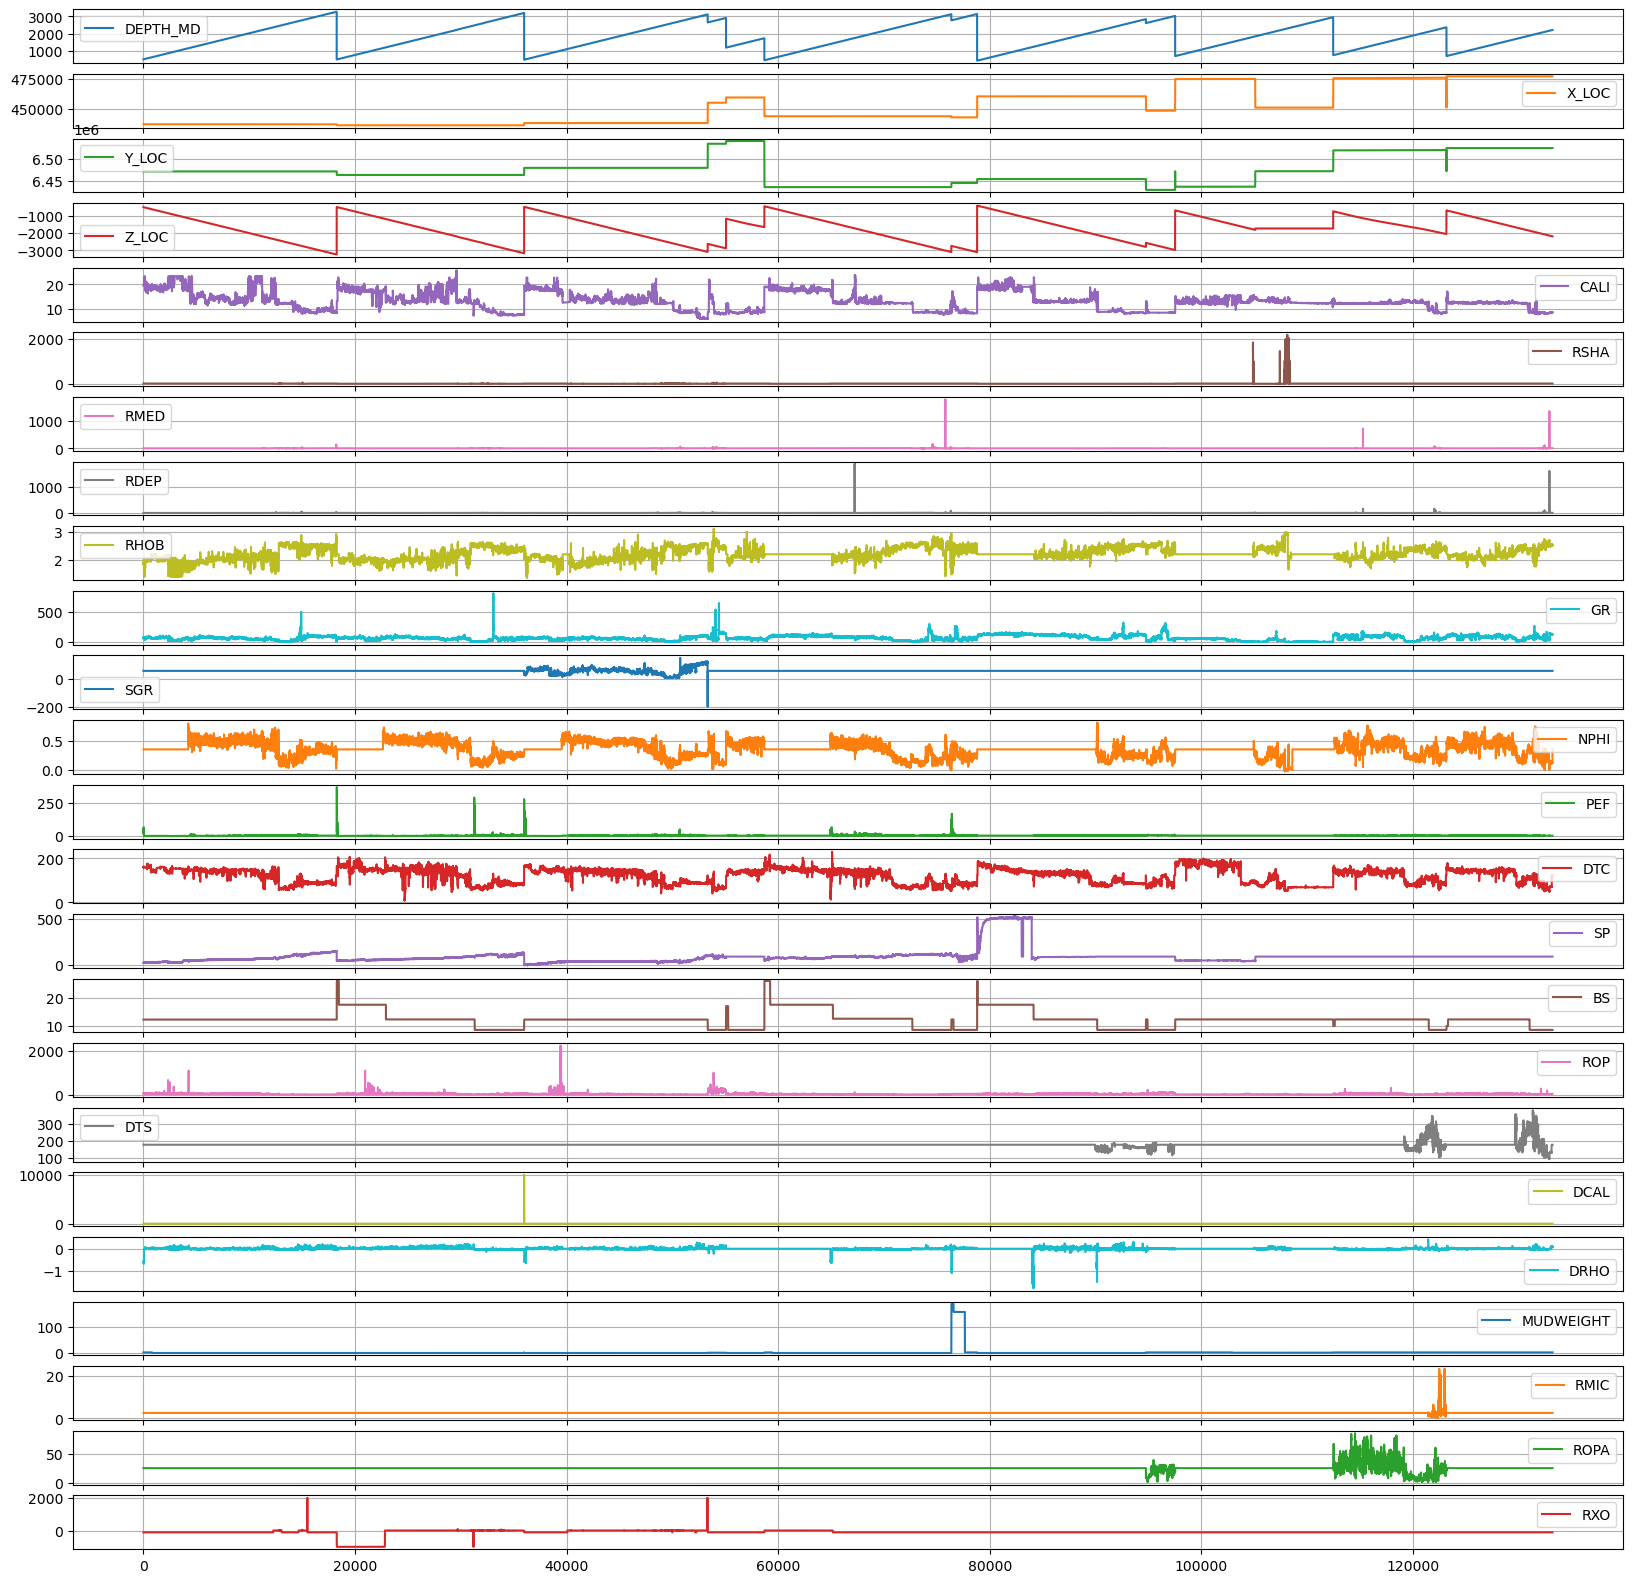

In [17]:
plt.style.use('default')
data.plot(subplots=True, grid=True, figsize=(20,20))
plt.show()